# **Distance Predictor Part Optuna**
Author: Declan Costello

Date: 10/21/2023

## **Part Optuna Description**

Here I Create hypertune parameters with Optuna

## **Table of Context**

1. Installation
2. Optuna
3. Viz

# **Installation**

The following installs the necessary packages

In [67]:
import optuna
import plotly
import matplotlib
import yellowbrick
import numpy as np
import pandas as pd
import xgboost as xgb
import sklearn.metrics
import sklearn.datasets
from xgboost import XGBRegressor
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import  RobustScaler, OneHotEncoder

In [78]:
from yellowbrick.model_selection import LearningCurve
from yellowbrick.model_selection import CVScores
from sklearn.model_selection import KFold
from yellowbrick.model_selection import FeatureImportances
from yellowbrick.regressor import ResidualsPlot
from yellowbrick.regressor import PredictionError
from yellowbrick.regressor import AlphaSelection
from yellowbrick.features import RadViz
import matplotlib.cm as cm
from yellowbrick.features import Rank1D
from yellowbrick.features import Rank2D
from yellowbrick.features import PCA




# **Data Import**

In [69]:
data = pd.read_csv('FE_data.csv')

# **Yellow Brick**

In [70]:
feature_cols = ['launch_angle','launch_speed','pfx_x','pfx_z',"release_speed","domed", "spray_angle",'is_barrel','Pop','pull_percent','home_team',"stand","p_throws",'grouped_pitch_type','fav_platoon_split_for_batter']

X = data.loc[:, feature_cols]

categorical_cols = ['home_team',"stand","p_throws",'grouped_pitch_type','fav_platoon_split_for_batter'] 
X = pd.get_dummies(X, columns=categorical_cols, drop_first=True)

target_cols = ['hit_distance_sc'] 
y = data.loc[:, target_cols]

In [71]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42,stratify = X[['home_team_COL','is_barrel','stand_R','p_throws_R']])

In [72]:
RandomForestRegressor = RandomForestRegressor()

**Learning Curve**

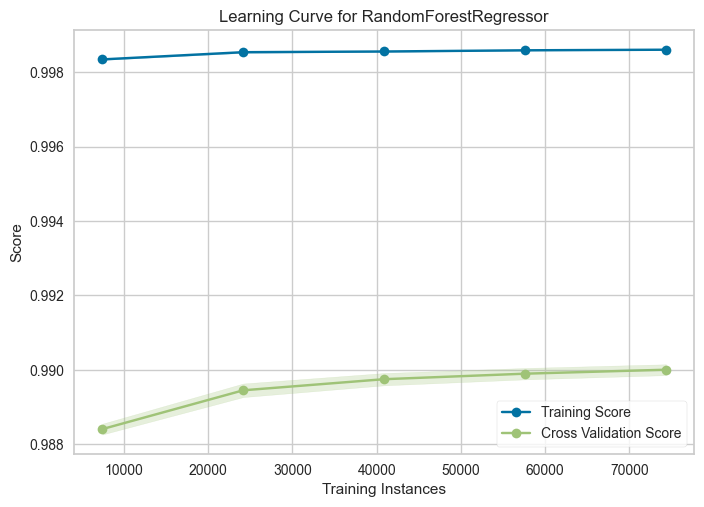

<Axes: title={'center': 'Learning Curve for RandomForestRegressor'}, xlabel='Training Instances', ylabel='Score'>

In [7]:
visualizer = LearningCurve(RandomForestRegressor, scoring='r2')

visualizer.fit(X_train, y_train.values.ravel())        # Fit the data to the visualizer
visualizer.show() 

**Cross Validation Scores**

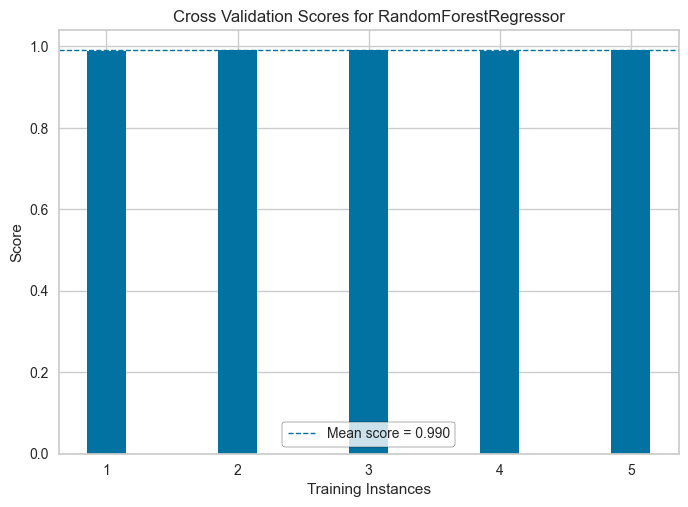

<Axes: title={'center': 'Cross Validation Scores for RandomForestRegressor'}, xlabel='Training Instances', ylabel='Score'>

In [9]:
cv = KFold(n_splits=5, shuffle=True, random_state=42)

cv_visualizer = CVScores(RandomForestRegressor, cv=cv, scoring='r2')

cv_visualizer.fit(X_train, y_train.values.ravel())      # Fit the data to the visualizer
cv_visualizer.show()   

**Stacked Feature Importances**

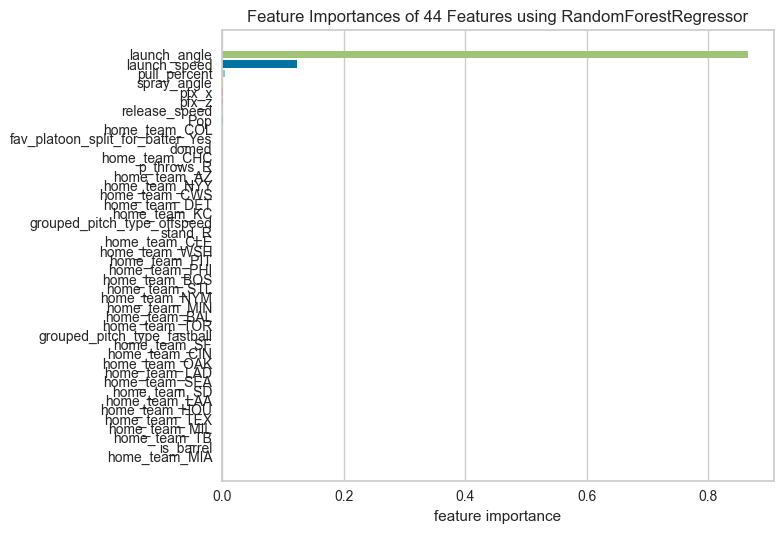

<Axes: title={'center': 'Feature Importances of 44 Features using RandomForestRegressor'}, xlabel='feature importance'>

In [10]:
FeatureImportances_viz = FeatureImportances(RandomForestRegressor, stack=True, relative=False)
FeatureImportances_viz.fit(X_train, y_train.values.ravel())
FeatureImportances_viz.show()

**Top and Bottom Feature Importances**

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


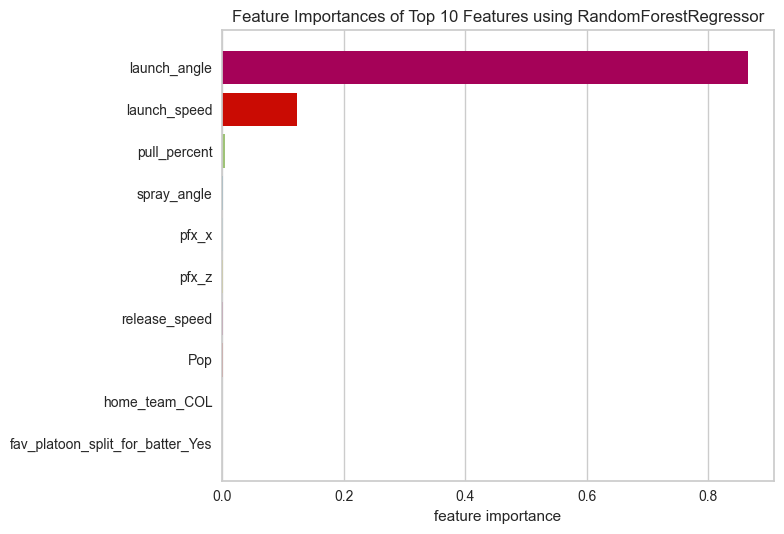

<Axes: title={'center': 'Feature Importances of Top 10 Features using RandomForestRegressor'}, xlabel='feature importance'>

In [12]:
FeatureImportances_viz_tb = FeatureImportances(RandomForestRegressor, stack=True, relative=False, topn=10)
FeatureImportances_viz_tb.fit(X_train, y_train.values.ravel())
FeatureImportances_viz_tb.show()

**Residuals Plot**

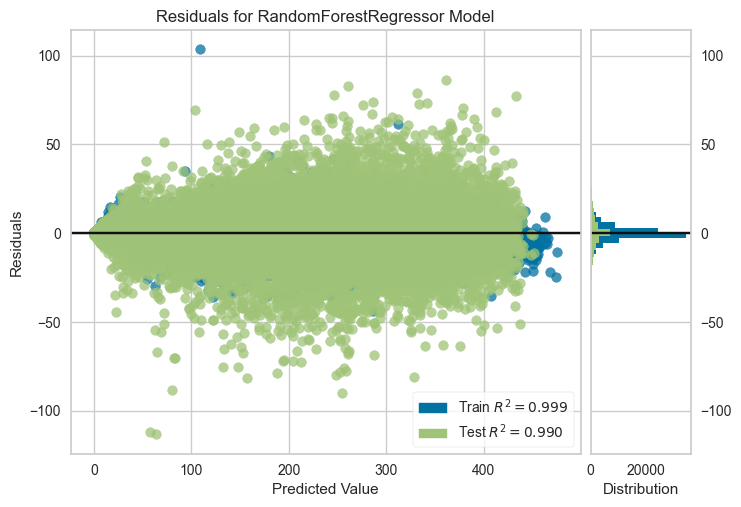

<Axes: title={'center': 'Residuals for RandomForestRegressor Model'}, xlabel='Predicted Value', ylabel='Residuals'>

In [58]:
ResidualsPlot_1_visualizer = ResidualsPlot(RandomForestRegressor)

ResidualsPlot_1_visualizer.fit(X_train, y_train.values.ravel()) # Fit the training data to the visualizer
ResidualsPlot_1_visualizer.score(X_test, y_test.values.ravel())  # Evaluate the model on the test data
ResidualsPlot_1_visualizer.show()

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


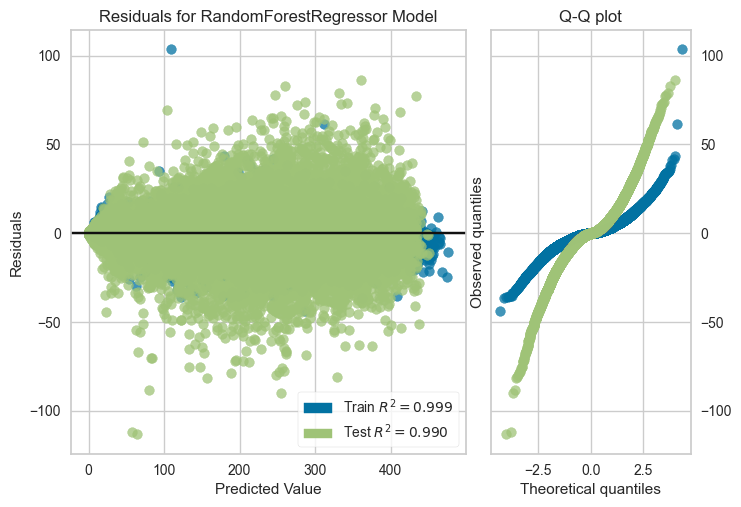

<Axes: title={'center': 'Residuals for RandomForestRegressor Model'}, xlabel='Predicted Value', ylabel='Residuals'>

In [60]:
ResidualsPlot_2_visualizer = ResidualsPlot(RandomForestRegressor, alpha = 0.05, hist=False, qqplot=True)
ResidualsPlot_2_visualizer.fit(X_train, y_train.values.ravel()) # Fit the training data to the visualizer
ResidualsPlot_2_visualizer.score(X_test, y_test.values.ravel())  # Evaluate the model on the test data
ResidualsPlot_2_visualizer.show()

**Prediction Error Plot**

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


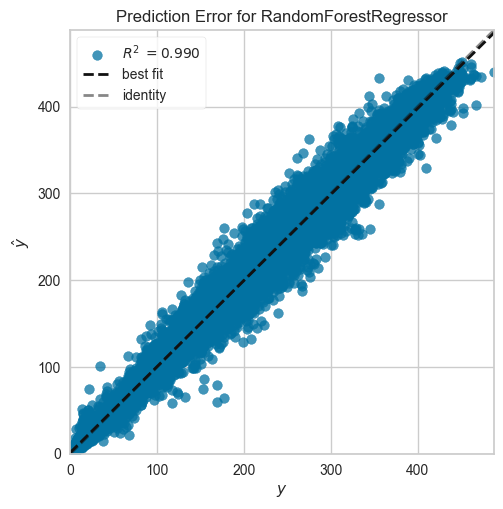

<Axes: title={'center': 'Prediction Error for RandomForestRegressor'}, xlabel='$y$', ylabel='$\\hat{y}$'>

In [15]:
PredictionError_visualizer = PredictionError(RandomForestRegressor)

PredictionError_visualizer.fit(X_train, y_train.values.ravel())  # Fit the training data to the visualizer
PredictionError_visualizer.score(X_test, y_test.values.ravel())  # Evaluate the model on the test data
PredictionError_visualizer.show() 

**Alpha Selection**

- changed model because randomforest does not use alpha...

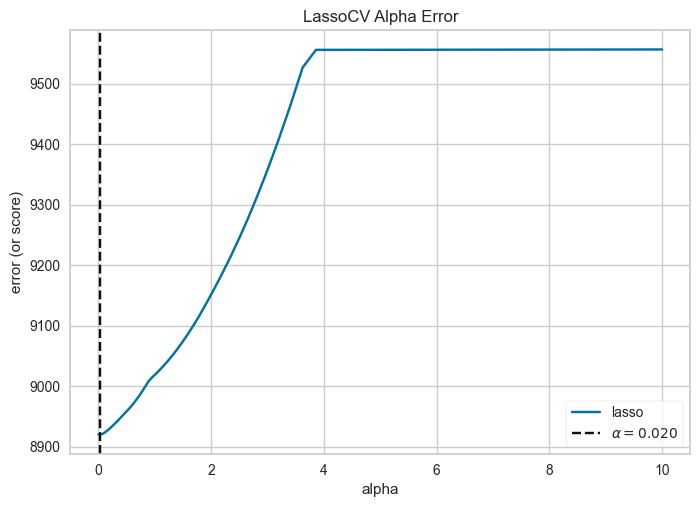

<Axes: title={'center': 'LassoCV Alpha Error'}, xlabel='alpha', ylabel='error (or score)'>

In [16]:
from sklearn.linear_model import LassoCV

alphas = np.logspace(-10, 1, 400)

# Instantiate the linear model and visualizer
model = LassoCV(alphas=alphas)
AlphaSelection_visualizer = AlphaSelection(model)
AlphaSelection_visualizer.fit(X_train, y_train.values.ravel()) 
AlphaSelection_visualizer.show()

**Rank 1D**

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/scipy/stats/_morestats.py:1816: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


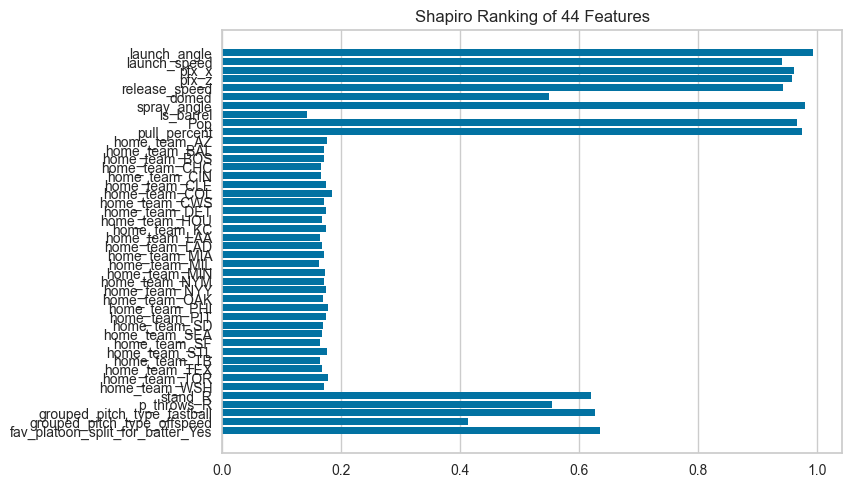

<Axes: title={'center': 'Shapiro Ranking of 44 Features'}>

In [73]:
visualizer = Rank1D(algorithm='shapiro')

visualizer.fit(X_train, y_train.values.ravel())          # Fit the data to the visualizer
visualizer.transform(X_train)        # Transform the data
visualizer.show() 

**Rank D2**

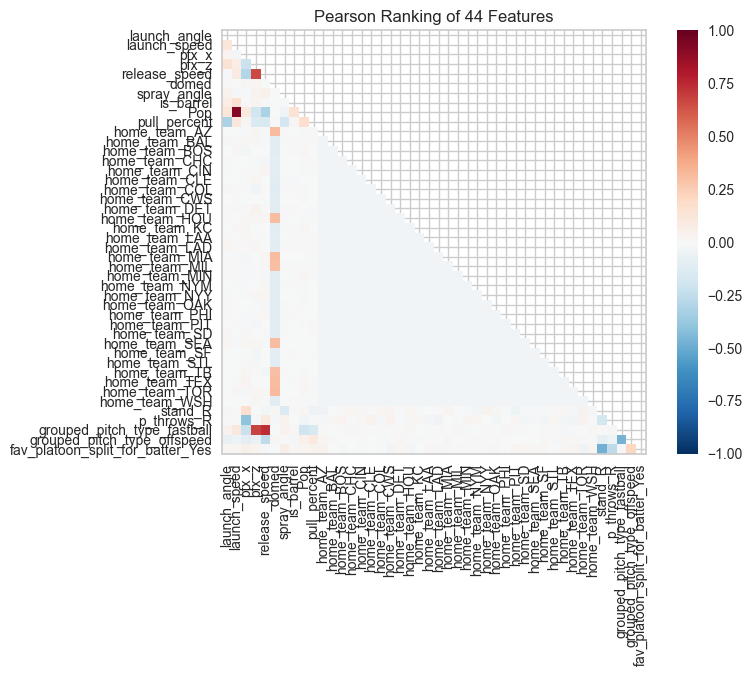

<Axes: title={'center': 'Pearson Ranking of 44 Features'}>

In [75]:
visualizer = Rank2D(algorithm='pearson')

visualizer.fit(X_train, y_train.values.ravel())          # Fit the data to the visualizer
visualizer.transform(X_train)        # Transform the data
visualizer.show()

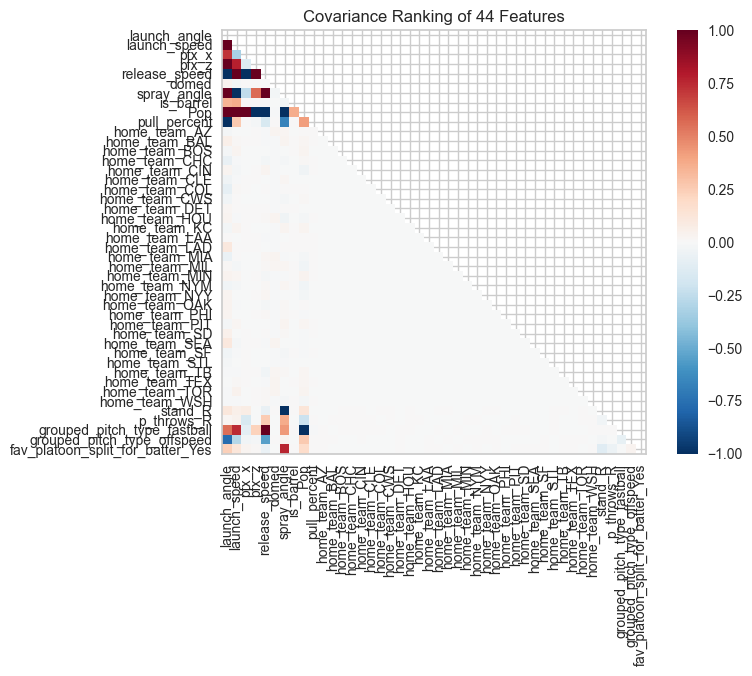

<Axes: title={'center': 'Covariance Ranking of 44 Features'}>

In [76]:
visualizer = Rank2D(algorithm='covariance')

visualizer.fit(X_train, y_train.values.ravel())          # Fit the data to the visualizer
visualizer.transform(X_train)        # Transform the data
visualizer.show()

**PCA**

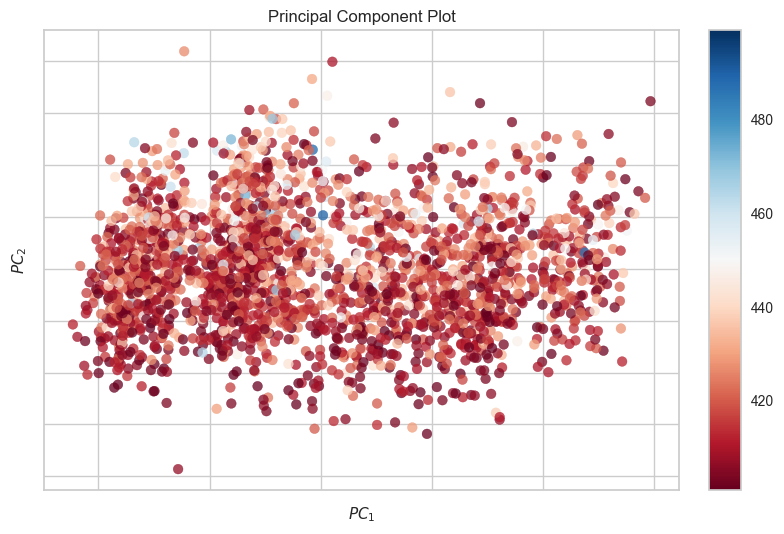

<Axes: title={'center': 'Principal Component Plot'}, xlabel='$PC_1$', ylabel='$PC_2$'>

In [81]:
rad_viz_data = data[data['hit_distance_sc'] > 400]

feature_cols = ['launch_angle','launch_speed','pfx_x','pfx_z','pull_percent',"stand","p_throws"]

X = rad_viz_data.loc[:, feature_cols]

categorical_cols = ["stand","p_throws"]
X = pd.get_dummies(X, columns=categorical_cols, drop_first=True)

target_cols = ['hit_distance_sc'] 
y = rad_viz_data.loc[:, target_cols]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42,stratify = X[['stand_R','p_throws_R']])

unique_classes = np.unique(y_train)

classes = unique_classes.tolist()

min_target = 400  # Set the minimum value to 400
max_target = 500  # Set the maximum value to 500

def custom_color_mapping(value):
    # Map the value to a color using a colormap within the 400-500 range
    normalized_value = (value - min_target) / (max_target - min_target)
    color = cm.RdYlBu(normalized_value)
    return color

# Apply the custom color mapping to each target value
colors = [custom_color_mapping(value) for value in y_train.values.ravel()]


# Instantiate the PCA visualizer with custom colors
visualizer = PCA(scale=True, classes=classes, colors=colors)

visualizer.fit_transform(X_train, y_train.values.ravel())  # Fit the data to the visualizer
visualizer.show()

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/yellowbrick/features/pca.py:458: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.
  self.fig.tight_layout()


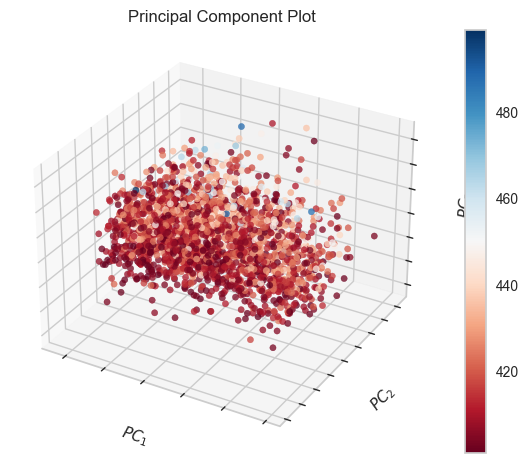

<Axes3D: title={'center': 'Principal Component Plot'}, xlabel='$PC_1$', ylabel='$PC_2$', zlabel='$PC_3$'>

In [82]:
classes = ['launch_angle', 'launch_speed', 'pull_percent']

visualizer = PCA(
    scale=True, projection=3, classes=classes
)
visualizer.fit_transform(X_train, y_train.values.ravel()) 
visualizer.show()

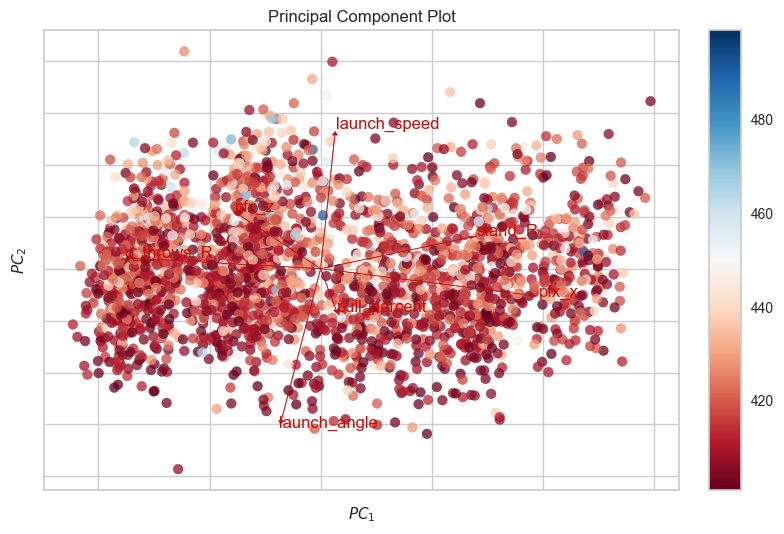

<Axes: title={'center': 'Principal Component Plot'}, xlabel='$PC_1$', ylabel='$PC_2$'>

In [83]:
visualizer = PCA(scale=True, proj_features=True)
visualizer.fit_transform(X_train, y_train.values.ravel()) 
visualizer.show()

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/yellowbrick/features/pca.py:458: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.
  self.fig.tight_layout()


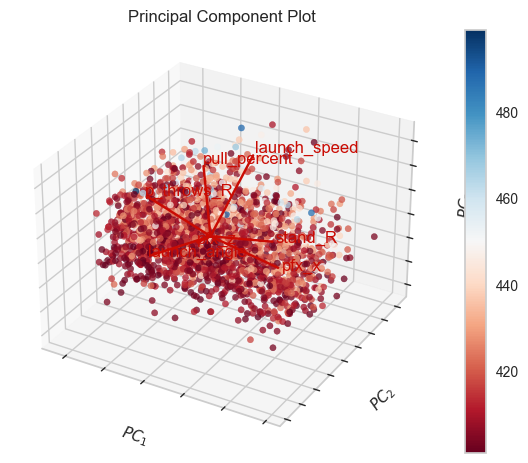

<Axes3D: title={'center': 'Principal Component Plot'}, xlabel='$PC_1$', ylabel='$PC_2$', zlabel='$PC_3$'>

In [84]:
visualizer = PCA(scale=True, proj_features=True, projection=3)
visualizer.fit_transform(X_train, y_train.values.ravel()) 
visualizer.show()

In [ ]:
https://www.scikit-yb.org/en/latest/api/features/manifold.html

**RadViz Visualizer**

- Looks bad for regression IMO, but supper cool for classification

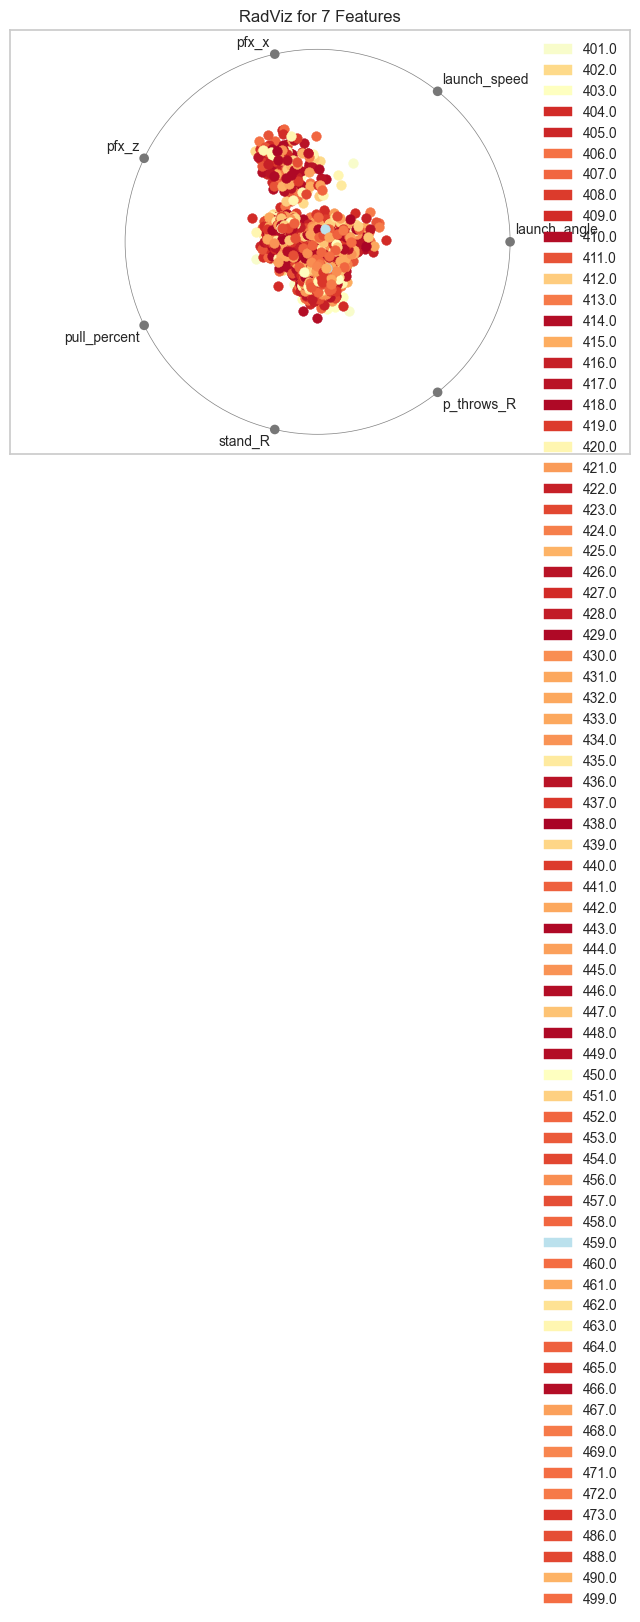

<Axes: title={'center': 'RadViz for 7 Features'}>

In [79]:
rad_viz_data = data[data['hit_distance_sc'] > 400]

feature_cols = ['launch_angle','launch_speed','pfx_x','pfx_z','pull_percent',"stand","p_throws"]

X = rad_viz_data.loc[:, feature_cols]

categorical_cols = ["stand","p_throws"]
X = pd.get_dummies(X, columns=categorical_cols, drop_first=True)

target_cols = ['hit_distance_sc'] 
y = rad_viz_data.loc[:, target_cols]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42,stratify = X[['stand_R','p_throws_R']])

unique_classes = np.unique(y_train)

classes = unique_classes.tolist()

min_target = 400  # Set the minimum value to 400
max_target = 500  # Set the maximum value to 500

def custom_color_mapping(value):
    # Map the value to a color using a colormap within the 400-500 range
    normalized_value = (value - min_target) / (max_target - min_target)
    color = cm.RdYlBu(normalized_value)
    return color

# Apply the custom color mapping to each target value
colors = [custom_color_mapping(value) for value in y_train.values.ravel()]


# Instantiate the RadViz visualizer with custom colors
visualizer = RadViz(classes=classes, colors=colors)

visualizer.fit(X_train, y_train.values.ravel())  # Fit the data to the visualizer
visualizer.transform(X_train)  # Transform the data
visualizer.show()
